In [109]:
# Test Machine Learning 1

In [141]:
import sys 
import scipy 
import numpy 
import matplotlib 
import pandas 
import sklearn 

In [143]:
import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [144]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-lenght', 'sepal-widht', 'petal-lenght', 'petal-width', 'class']
dataset = pandas.read_csv(url, names = names) # pandas serve per caricare dataset

In [145]:
print(dataset.shape) # 150 row (instances) 5 columns (types)

(150, 5)


In [146]:
print(dataset.head)

<bound method NDFrame.head of      sepal-lenght  sepal-widht  petal-lenght  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [147]:
print(dataset.describe()) # è uno studio banale di tutto, quindi con tutti i fattori importanti

       sepal-lenght  sepal-widht  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [148]:
# numero di elementi per ogni classe, ossia il tipo di fiore considerato
print(dataset.groupby('class').size()) 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


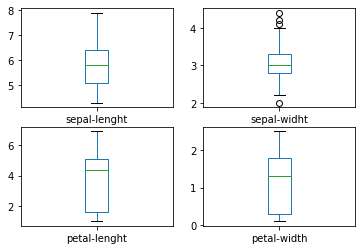

In [149]:
################################ VISUALISATION ####################################
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()
# kind = boxplot
# layout subplots decide come metterli
# sharex, sharey condivide gli assi

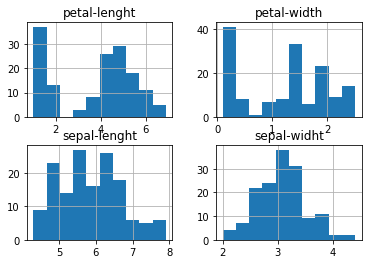

In [150]:
dataset.hist()
plt.show()

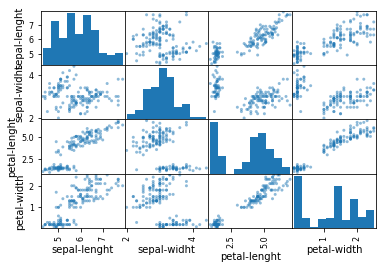

In [151]:
scatter_matrix(dataset)
plt.show()

In [179]:
# okay, ora effettivamente facciamo machine learning
# creiamo test and train

array = dataset.values
is_setosa = dataset['class']=="Iris-setosa"
# array = array[is_setosa]
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)
# non è magia, mi sono solo creato train e test scegliendo elementi random, dove train 80%, test 20%. Ora provo vari modelli

In [180]:
seed = 6
scoring = 'accuracy'

print(X_train.shape)
print(Y_train.shape)

(120, 4)
(120,)


In [181]:
models = []
models.append(('LR  ', LogisticRegression()))
models.append(('LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN ', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB  ', GaussianNB()))
models.append(('SVM ', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10) #, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

LR  : 0.950000 (0.076376)
LDA : 0.975000 (0.038188)
KNN : 0.958333 (0.055902)
CART: 0.925000 (0.069222)
NB  : 0.966667 (0.055277)
SVM : 0.950000 (0.076376)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'AxesSubplot' object has no attribute 'set_xticktables'

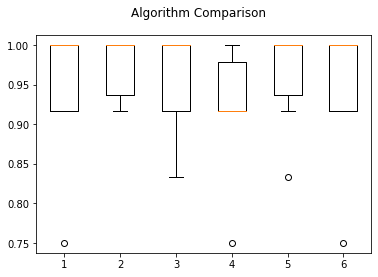

In [182]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticktables(names)
plt.show()